In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv("ai_job_dataset.csv")

In [ ]:
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['application_deadline'] = pd.to_datetime(data['application_deadline'])


* Changing **str** data type to **datetime** for *Date-Time* Columns.
* Changing **Remote Ratio** to Numerical Datatype.

In [ ]:
data['remote_type'] = data['remote_ratio'].map({
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
})
data.drop('remote_ratio', axis=1, inplace=True)

In [ ]:
data.sample(5)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,remote_type
10200,AI10201,Data Scientist,99738,USD,SE,FT,China,L,China,"SQL, Linux, Tableau",Associate,5,Consulting,2024-11-10,2025-01-19,2249,6.5,TechCorp Inc,Hybrid
10306,AI10307,Principal Data Scientist,165611,USD,EX,FT,India,M,Australia,"Scala, Hadoop, Python, Computer Vision",Master,19,Consulting,2024-09-23,2024-10-15,2112,9.2,DeepTech Ventures,Remote
9706,AI09707,AI Architect,73927,USD,EN,FT,Singapore,L,Singapore,"Python, Mathematics, SQL, Statistics",Associate,0,Finance,2025-04-04,2025-06-04,1755,6.5,Future Systems,Remote
12347,AI12348,Principal Data Scientist,95003,USD,MI,CT,Norway,M,Norway,"Statistics, Git, Scala",Bachelor,4,Energy,2024-10-23,2024-11-16,1944,6.6,Cloud AI Solutions,Hybrid
12012,AI12013,ML Ops Engineer,168440,USD,SE,FT,Denmark,S,Germany,"Linux, Scala, Git, Computer Vision, SQL",PhD,6,Manufacturing,2024-02-25,2024-03-25,1545,9.9,Predictive Systems,Remote


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   required_skills         15000 non-null  object        
 10  education_required      15000 non-null  object        
 11  years_experience        15000 non-null  int64         
 12  industry                15000 non-null  object

In [ ]:
data.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
required_skills,0


* No columns has Null values.


In [ ]:
data.describe()

,salary_usd,years_experience,posting_date,application_deadline,job_description_length,benefits_score
count,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000
mean,115348.965133,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,1503.314733,7.504273
min,32519.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,500.000000,5.000000
25%,70179.750000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,1003.750000,6.200000
50%,99705.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,1512.000000,7.500000
75%,146408.500000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,2000.000000,8.800000
max,399095.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,2499.000000,10.000000
std,60260.940438,5.545768,NaN,NaN,576.127083,1.450870


* There are **4 Numerical Coulmns** and **2 DateTime** Columns in the Dataset

In [ ]:
data.shape

(15000, 19)

* Dataset has **15000 Rows** and **19 Columns**.

In [ ]:
from ydata_profiling import ProfileReport
pf = ProfileReport(data)
pf.to_file(output_file="Job_analysis_2025.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:00<00:00, 23.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

* Observing Overview of data.

## Data Observations

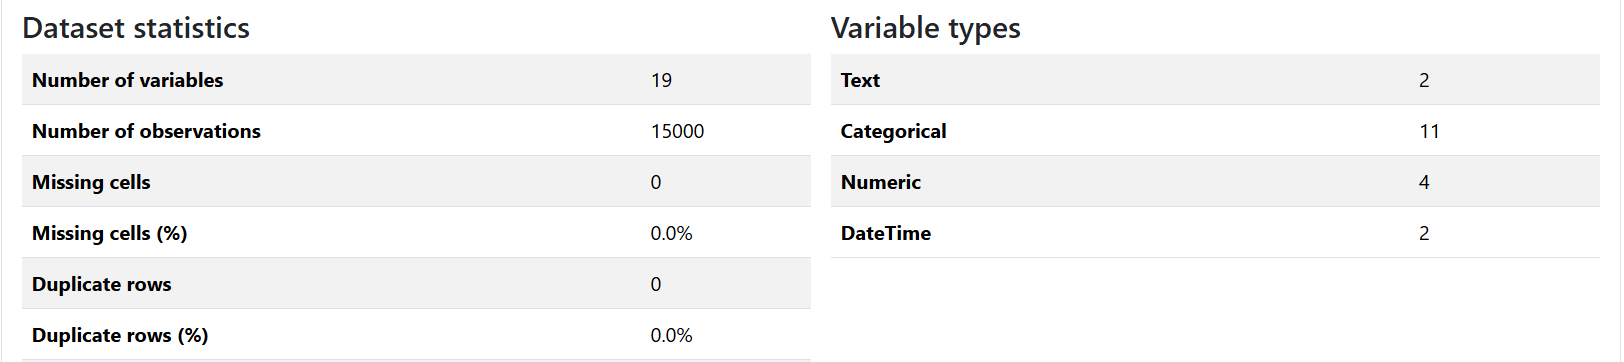

In [ ]:
from IPython.display import Image
Image('Dataset_Overview.png')

## 1] Job Title

In [ ]:

top_5_jobs = data['job_title'].value_counts().nlargest(5).index


In [ ]:

filtered_data = data[data['job_title'].isin(top_5_jobs)]


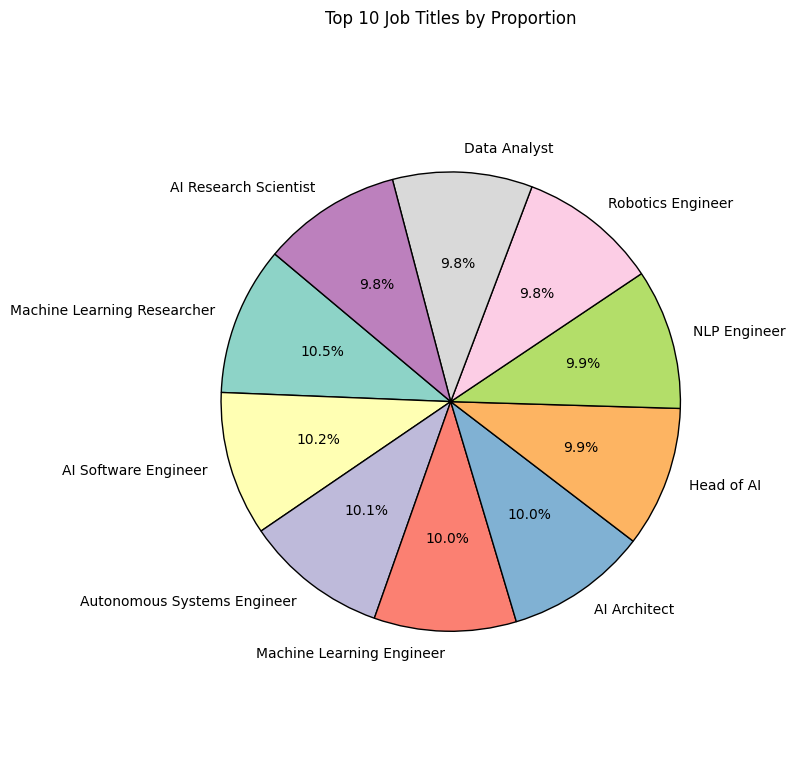

In [ ]:
# Step 1: Get top 10 job titles
top_10_jobs = data['job_title'].value_counts().nlargest(10)

# Step 2: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_jobs.values,
    labels=top_10_jobs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3'),
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Top 10 Job Titles by Proportion")
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()


### Insights
* High demand for AI/ML roles—top 5 are all AI-related.

* Shift toward specialized roles (e.g., AI Architect, Autonomous Systems Engineer).

* Research-focused roles like ML Researcher are leading—R&D is a priority.  

* Engineering roles dominate over analyst roles—industry is moving beyond basic analytics.  

* Suggest internal upskilling programs to meet AI talent needs.

## 2] Salary vs Education vs Experience

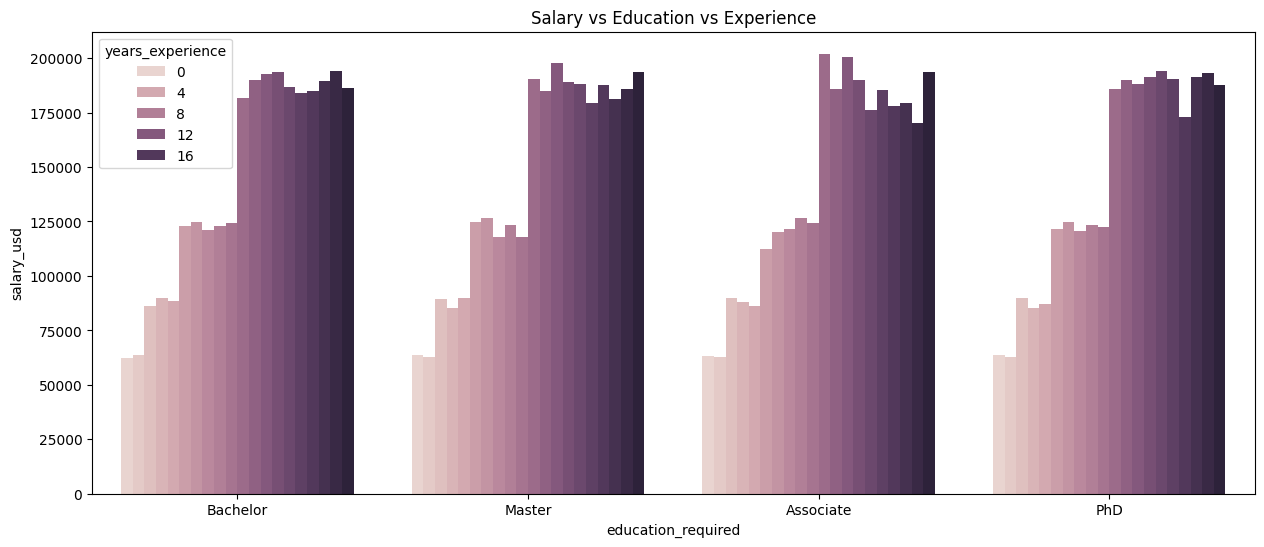

In [ ]:
plt.figure(figsize=(15, 6))

sns.barplot(x='education_required', y='salary_usd', hue='years_experience' , data=data ,errorbar=None )
plt.title("Salary vs Education vs Experience")
plt.show()

### Insights from Salary vs Education vs Experience
* Salary increases with experience across all education levels
More years of experience lead to higher salaries, regardless of degree type.

* **PhD* holders consistently earn the highest salaries
At nearly every experience level, **PhD** graduates top the salary chart.

* **Bachelor’s** and **Associate degrees** offer similar salary growth up to mid-level experience
These two education levels show comparable salary trends until around 8–12 years of experience.

* **Master’s** degree offers balanced growth higher than **Bachelor’s**, lower than **PhD**
Provides a strong salary trajectory without requiring a PhD.

* Education has a strong impact early in a career; experience dominates later initial salary differences are shaped by degree, but over time, experience becomes the bigger driver.

##3] Remote Type vs Company Location

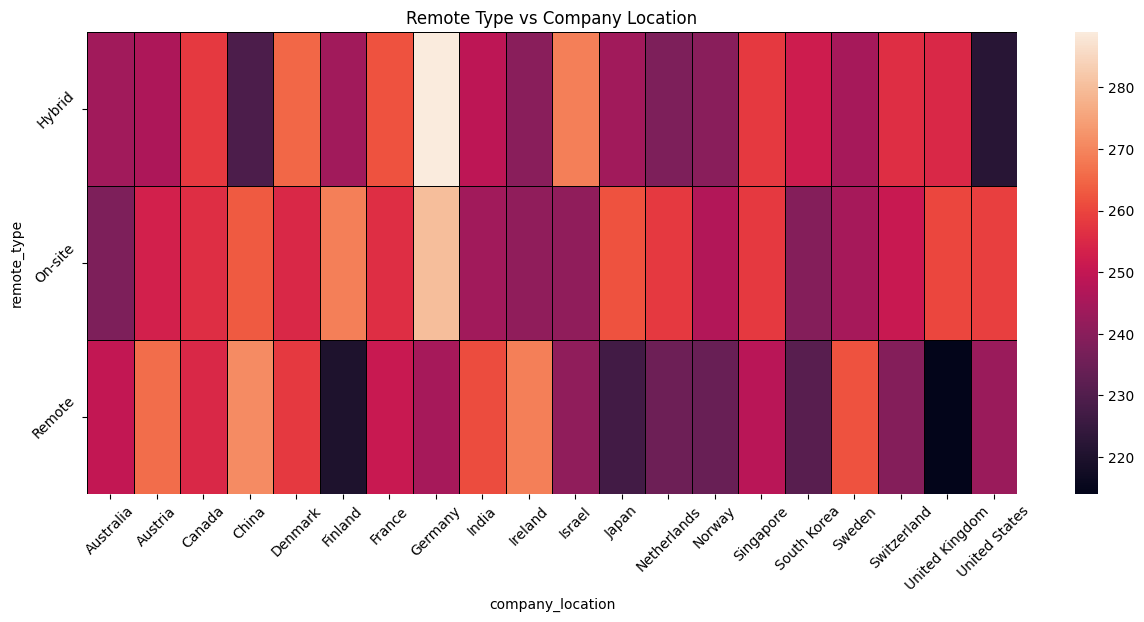

In [ ]:
plt.figure(figsize=(15, 6))

sns.heatmap(data.pivot_table(index='remote_type', columns='company_location', values='job_id', aggfunc='count' , observed=True) , linewidths=0.5, linecolor='black' ,)
plt.title("Remote Type vs Company Location")

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()


### Insights

* **Germany** has the highest number of hybrid and on-site jobs, suggesting a preference for mixed or traditional work environments.

* **China** and **Canada** show higher remote job counts, indicating strong remote-friendly policies.

* **Finland** and **United Kingdom** show relatively low remote job presence, implying limited remote opportunities.

* **India** and **Ireland** show a balanced distribution across all three types, signaling flexible work models.

* Remote jobs are fairly spread, but fewer in **Japan**, **UK**, and **Switzerland**, pointing to more office-based work cultures there.

## 4] Number of companies vs Salary Currency

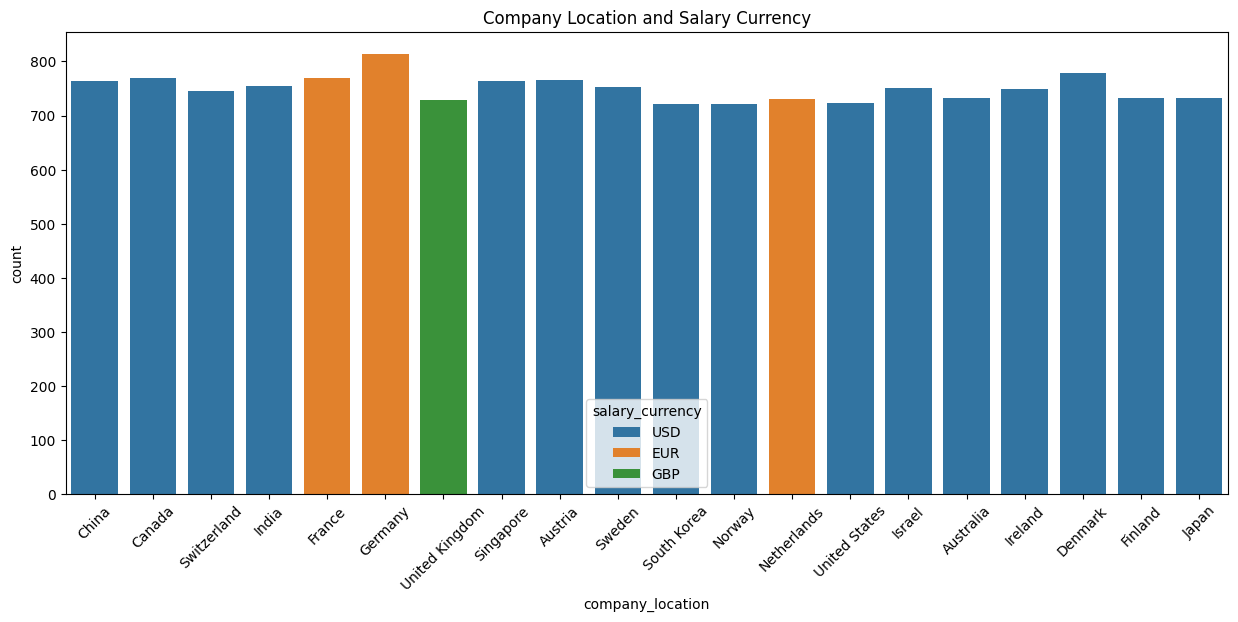

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='company_location' , hue='salary_currency' ,data=data)
plt.title("Company Location and Salary Currency")
plt.xticks(rotation=45)
plt.show()

## Insights from Salary Currency Distribution by Country
* *USD* is the dominant salary currency globally.  
* *EUR* is used in select European countries Countries like **Germany**, **France**, and the **Netherlands** report salaries in EUR, as expected for Eurozone nations.  
* *GBP* is used exclusively in the *UK* .The **United Kingdom** is the only country using *GBP*, reflecting its distinct currency system.  
* The heavy use of *USD* across diverse locations may indicate a trend toward standardized reporting, aiding easier salary comparisons.  
* Despite each country’s standard currency, the frequent use of *USD* reflects international hiring and salary normalization in global tech roles.

## 5] Employment Type vs Employment Experience Level

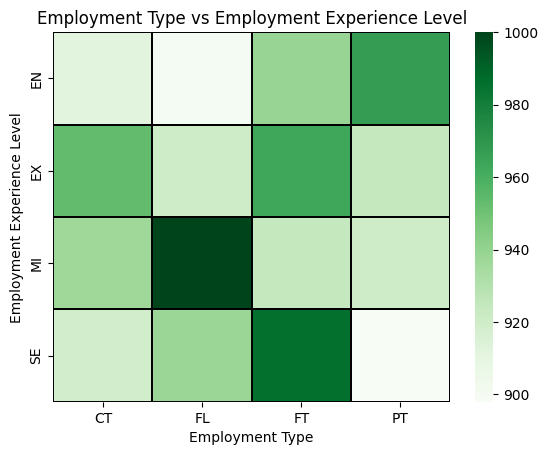

In [ ]:
sns.heatmap(pd.pivot_table(data, index='experience_level', columns ='employment_type' , values='job_id', aggfunc='count') ,cmap='Greens',linewidths=0.2 ,linecolor='black')
plt.xlabel("Employment Type")
plt.ylabel("Employment Experience Level")
plt.title("Employment Type vs Employment Experience Level")
plt.show()

## Insights

* **Mid-Level Freelance (MI–FL)** is the most common combination, indicating companies rely heavily on freelancers with moderate experience.

* **Senior Full-Time (SE–FT)** roles are also very prominent, showing demand for experienced professionals in stable, long-term roles.

* **Entry-Level Part-Time (EN–PT)** jobs are relatively more common, offering flexible options for newcomers in AI.

* **Expert Part-Time (EX–PT)** and **Senior Part-Time (SE–PT)** roles are the least common, suggesting part-time work is rare for high-level positions.

* **Freelance** roles span all experience levels, but skew toward Mid and Senior, likely for project-based expertise.

##6] Company size by Count

In [ ]:

pd.pivot_table(data, index='company_size', values='company_name', aggfunc='count')


,company_name
company_size,
L,4998
M,4995
S,5007


### Insight

* AI job opportunities are evenly distributed across company sizes, with small, medium, and large firms each contributing roughly one-third of the listings.

##7] Company Name vs Benefit Score and Salary

In [ ]:
pivot = pd.pivot_table(
    data,
    index=['company_name'],
    values=['salary_usd' , 'benefits_score'],
    aggfunc='sum'
).sort_values(by='benefits_score', ascending=False)
pivot

,benefits_score,salary_usd
company_name,,
TechCorp Inc,7380.4,118842993
Cognitive Computing,7334.1,109520181
AI Innovations,7229.2,107497348
Digital Transformation LLC,7192.4,108415738
Future Systems,7167.1,111620309
Quantum Computing Inc,7159.1,110709592
Cloud AI Solutions,7142.1,111024051
Predictive Systems,7068.3,108475699
Smart Analytics,7018.3,105738454


### Insights (Salary)

* **TechCorp Inc** leads with the highest total salary payout, followed by **Future Systems** and **Quantum Computing Inc**.

* Salaries are relatively competitive across top companies, all exceeding $100 million+ in cumulative payouts.

* This indicates high hiring volumes or premium compensation in these firms for AI talent.  

<hr/>

### Insights (Benefit Score)

*   **TechCorp Inc** also ranks highest in benefits score (7380+), suggesting a strong overall employee value proposition.

* **Cognitive Computing** and **AI Innovations** also offer very attractive benefits, even if they don’t lead in salary.

* Companies like **Algorithmic Solutions** and **DataVision** Ltd have lower benefits scores among the top salary payers, suggesting a possible trade-off between pay and perks.






##8] Number of Positing Job in industries

In [ ]:

pd.pivot_table(data, index='industry', values='posting_date', aggfunc='count').sort_values(by='posting_date', ascending=False)

,posting_date
industry,
Retail,1063
Media,1045
Automotive,1020
Consulting,1020
Technology,1011
Real Estate,1007
Government,998
Telecommunications,997
Healthcare,997


### Insights
* **Retail**, **Media**, and **Automotive** industries posted the most AI job openings, while **Education** and **Manufacturing** had the least indicating stronger AI hiring trends in consumer-facing sectors.*